1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import RandomizedPCA
from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab 
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import matplotlib.pyplot as plt
from numpy import where
from IPython.display import Image


In [2]:
#load dataset
df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)
df.head(10)

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879
6,No,Yes,919.588530,7491.558572
7,No,No,825.513331,24905.226578
8,No,Yes,808.667504,17600.451344
9,No,No,1161.057854,37468.529288
10,No,No,0.000000,29275.268293


2) Convert `default` and `student` to categorical variables.

In [3]:
df["default"]=df["default"].astype('category')
df["student"]=df["student"].astype('category')

In [4]:
df.dtypes

default    category
student    category
balance     float64
income      float64
dtype: object

3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

In [5]:
df_default=pd.get_dummies(df['default'])
df_student=pd.get_dummies(df['student'])
df_default.columns=['defaultNo','defaultYes']
df_student.columns=['studentNo','studentYes']
df_final = pd.concat([df[['balance','income']],df_default,df_student],axis=1)
df_final.dtypes

balance       float64
income        float64
defaultNo     float64
defaultYes    float64
studentNo     float64
studentYes    float64
dtype: object

In [6]:
df_final.head()

,balance,income,defaultNo,defaultYes,studentNo,studentYes
1,729.526495,44361.625074,1.0,0.0,1.0,0.0
2,817.180407,12106.134700,1.0,0.0,0.0,1.0
3,1073.549164,31767.138947,1.0,0.0,1.0,0.0
4,529.250605,35704.493935,1.0,0.0,1.0,0.0
5,785.655883,38463.495879,1.0,0.0,1.0,0.0


/Users/nanbinx/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


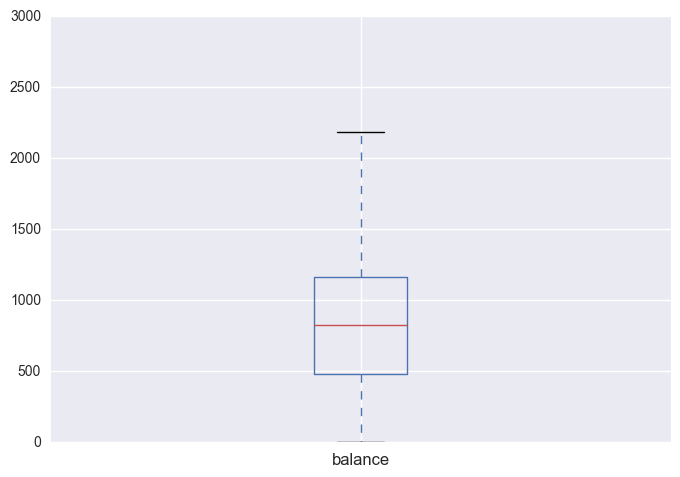

/Users/nanbinx/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


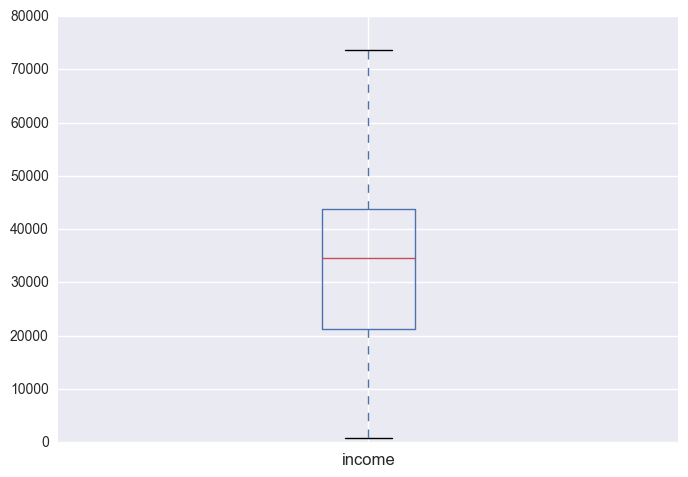

/Users/nanbinx/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


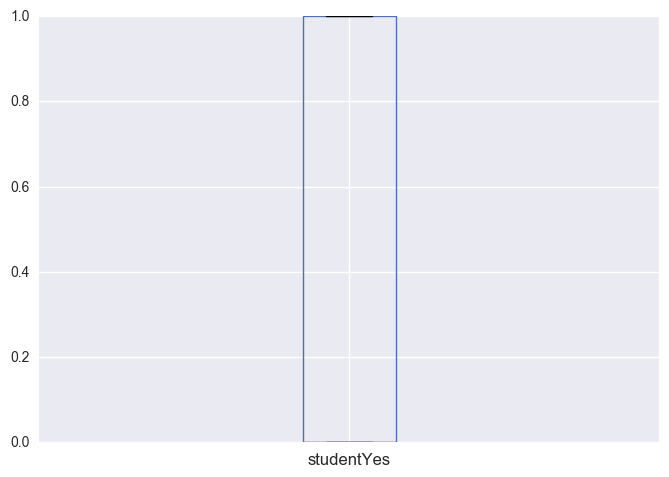

/Users/nanbinx/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


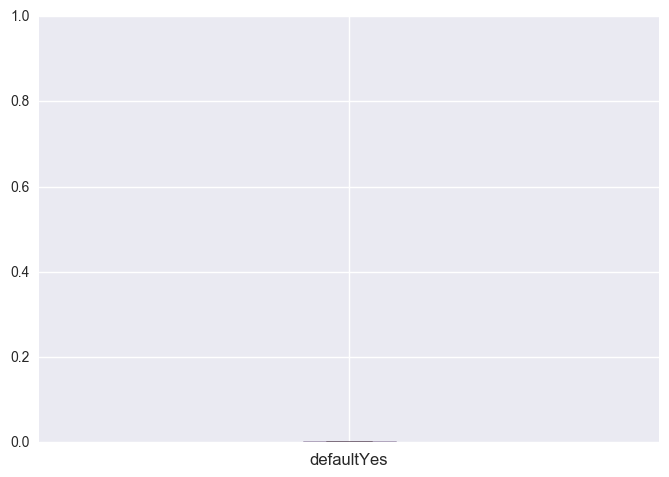

In [7]:
import pylab as plt
df_final[['balance']].boxplot()
plt.show()
df_final[['income']].boxplot()
plt.show()
df_final[['studentYes']].boxplot()
plt.show()
df_final[['defaultYes']].boxplot()
plt.show()

In [8]:
df_y = df_final[df_final.defaultYes==1]
df_n = df_final[df_final.defaultNo==1]
plt.figure(figsize=(10, 10))
plt.scatter(x=df_y['balance'], y=df_y['income'], c='r', label='defaultyes')
plt.scatter(x=df_n['balance'], y=df_n['income'], c='b', label='defaultNo')
plt.xlabel('balance')
plt.ylabel('income')


4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

In [9]:
from sklearn.cross_validation import train_test_split
X = df_final[['balance', 'income']]
y = df_final.defaultYes

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)
clf = LogisticRegression(penalty='l1')
clf.fit(X_train, y_train)
coef = clf.coef_

plt.figure(figsize=(10, 10))
x_min, x_max = X_train['balance'].min() - .5, X_train['balance'].max() + .5
y_min, y_max = X_train['income'].min() - .5, X_train['income'].max() + .5
x_m, y_m = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
plt.xlim(x_m.min(), x_m.max())
plt.ylim(y_m.min(), y_m.max())


b = clf.intercept_
w = clf.coef_[0]

x = np.arange(x_min, x_max, 1)
y = (b + w[0] * x) / -w[1]

plt.plot(x, y)
plt.title('decision boundary')

Area under the ROC curve : 0.965487


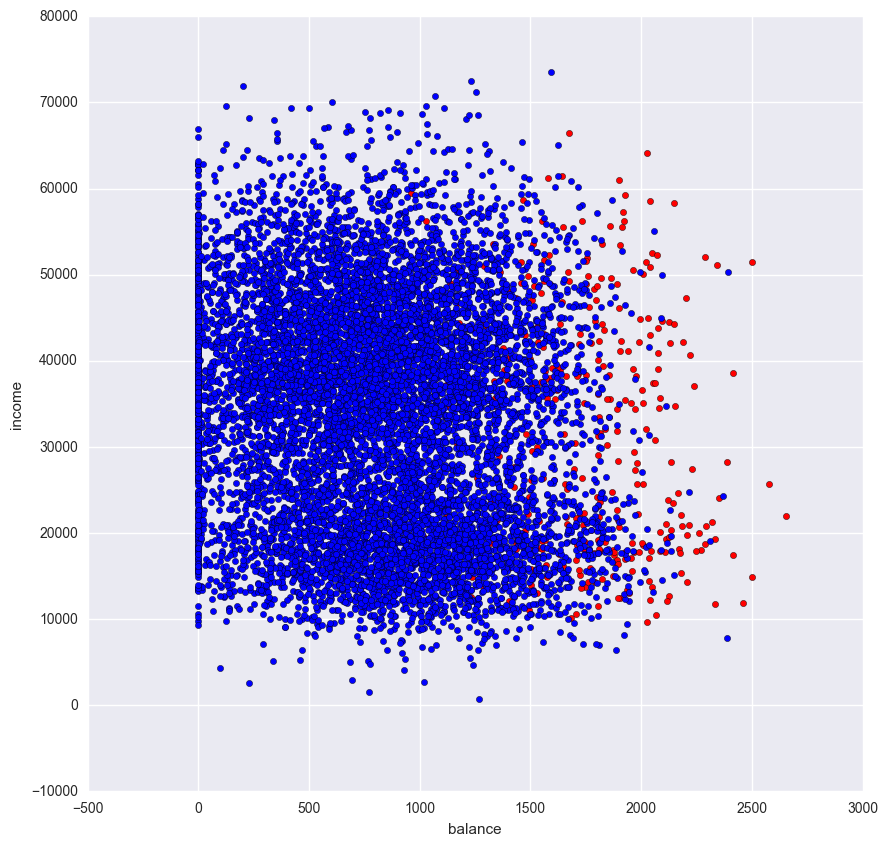

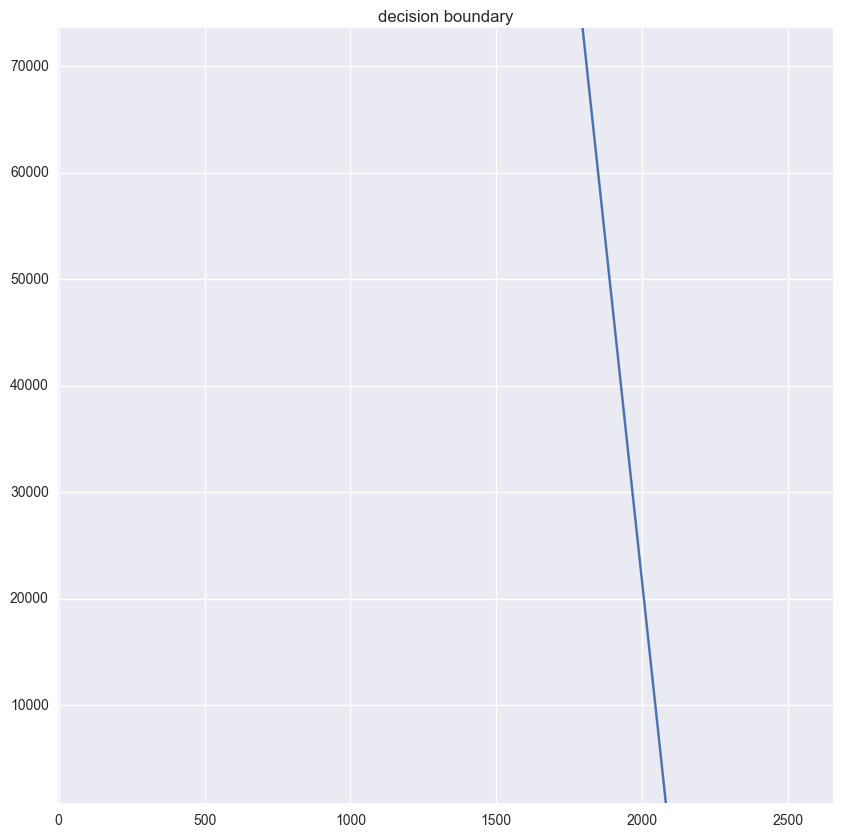

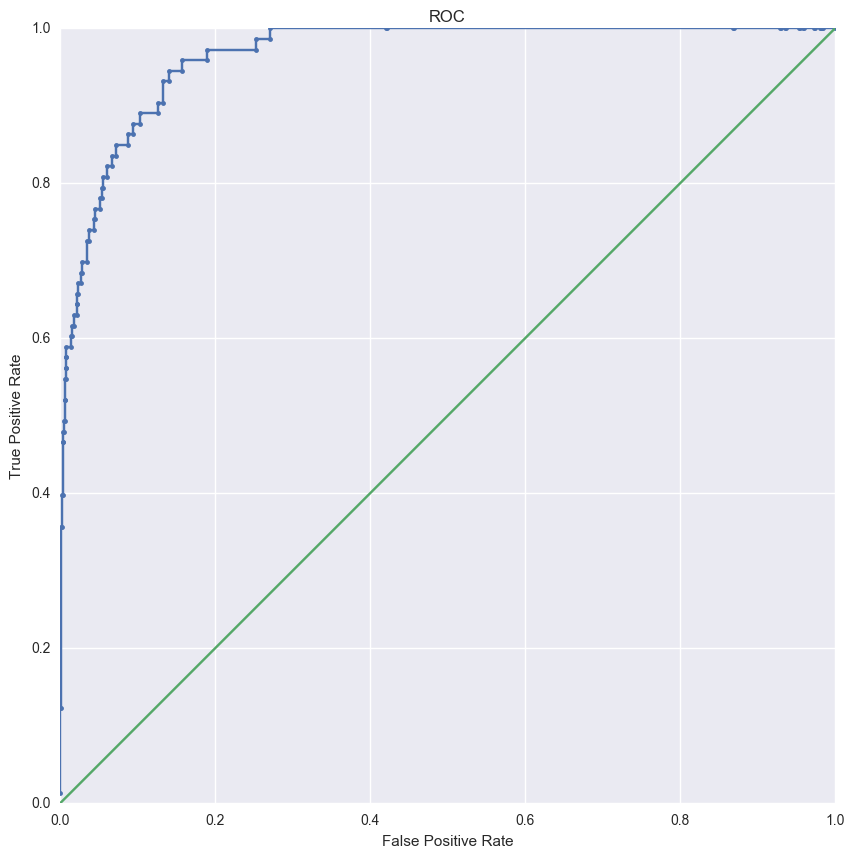

In [10]:
def generate_auc(X_train,y_train,clf_class,**kwargs):
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X_train,y_train,LogisticRegression,C=0.1,penalty='l1')
#
def generate_ROC(fpr,tpr,label,roc_auc):
    plt.figure(figsize=(10,10))
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.show()
    
# Plots ROC
generate_ROC(fpr,tpr,'LR',roc_auc)

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

In [11]:
X = df_final[['balance', 'income','studentYes']]
y = df_final.defaultYes

scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = np.logspace(-3,-1,30)

scores = []

for alpha in alphas:
    regr = LogisticRegression(C=alpha,penalty='l2')

    fpr, tpr, roc_auc, thresholds= generate_auc(X,y,LogisticRegression,C=alpha,penalty='l2')
    scores.append(roc_auc)
plt.plot(alphas,scores)

Area under the ROC curve : 0.942577
Area under the ROC curve : 0.942607
Area under the ROC curve : 0.942592
Area under the ROC curve : 0.942727
Area under the ROC curve : 0.942900
Area under the ROC curve : 0.943005
Area under the ROC curve : 0.943072
Area under the ROC curve : 0.943132
Area under the ROC curve : 0.943185
Area under the ROC curve : 0.943245
Area under the ROC curve : 0.943237
Area under the ROC curve : 0.943297
Area under the ROC curve : 0.943305
Area under the ROC curve : 0.943380
Area under the ROC curve : 0.943425
Area under the ROC curve : 0.943425
Area under the ROC curve : 0.943462
Area under the ROC curve : 0.943508
Area under the ROC curve : 0.943538
Area under the ROC curve : 0.943538
Area under the ROC curve : 0.943590
Area under the ROC curve : 0.943628
Area under the ROC curve : 0.943515
Area under the ROC curve : 0.943523
Area under the ROC curve : 0.943500
Area under the ROC curve : 0.943523
Area under the ROC curve : 0.943590
Area under the ROC curve : 0

In [12]:
alphas = np.logspace(-3,10,30)
enet = LogisticRegression() #C=alpha_best,penalty='l1')
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet = LogisticRegression(C=alpha,penalty='l2') 
    #enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
   
    probas_ = enet.predict_proba(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    train_errors.append(roc_auc)
    
    probas_ = enet.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    test_errors.append(roc_auc)

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)



coef =  LogisticRegression(C=alpha_optim,penalty='l2').fit(X,y).coef_

ind = np.arange(3)  
width = 0.50

balance = coef[np.array([0]),np.array([0])]
income = coef[np.array([0]),np.array([1])]
student = coef[np.array([0]),np.array([2])]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.bar([0,1,2],[balance,income,student],width)
ax.set_xticks([0,1,2])
ax.set_xticklabels(('balance', 'income', 'studentYes', 'studentNo'))

Optimal regularization parameter : 0.17433288222


6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

In [13]:
from sklearn.cross_validation import cross_val_score
cvs = cross_val_score(enet, X, y, cv =5)
cvs

array([ 0.97551224,  0.97351324,  0.971     ,  0.97248624,  0.97348674])

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

In [31]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")



#X = df_final[['balance', 'income']]
#y = df_final.defaultYes
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree

# features: student, balance, income
y = df_final.defaultYes
X = df_final.drop(['defaultYes'], 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

# Predict
y = clf.predict(X_test)

dt=DecisionTreeClassifier(max_depth=5)
visualize_tree(clf, feature_names=['x'])
tree.export_graphviz(clf,out_file='tree.dot') 


8) Find the optimal decision tree depth and compute the AUC ROC. 

In [21]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,6)
for n in depths:
    regr = DecisionTreeClassifier(max_depth=n)
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))



n_opt=depths[np.argmax(scores)]
print ("optimal depth is" , n_opt)

optimal depth is 5
